In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("./dataset.csv")

In [3]:
data.shape

(6347, 19)

In [4]:
data.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children', 'Clubhouse',
       'Intercom', 'Landscaped Gardens', 'Indoor Games', 'Gas Connection',
       'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [5]:
data.drop('Unnamed: 0' , inplace=True , axis=1)

In [6]:
data = data[data.groupby('Location')['Location'].transform('size') >=10]
len(data)

5569

<h3><mark>Removing the Amenities that are not  there in more than 40% of data</mark></h3>

In [7]:
def percent_missing(data):
    percent_0 = 100* data.isin([0]).sum() / len(data)
    percent_0 = percent_0[percent_0>0]
    return percent_0

In [8]:
percent_0 = percent_missing(data)
percent_0

New/Resale            63.727779
Gymnasium             39.235051
Lift Available        18.854372
Car Parking           46.040582
Maintenance Staff     75.938229
24x7 Security         45.483929
Children              39.791704
Clubhouse             46.633148
Intercom              47.908062
Landscaped Gardens    62.470821
Indoor Games          76.243491
Gas Connection        74.681271
Jogging Track         58.143293
Swimming Pool         50.817023
dtype: float64

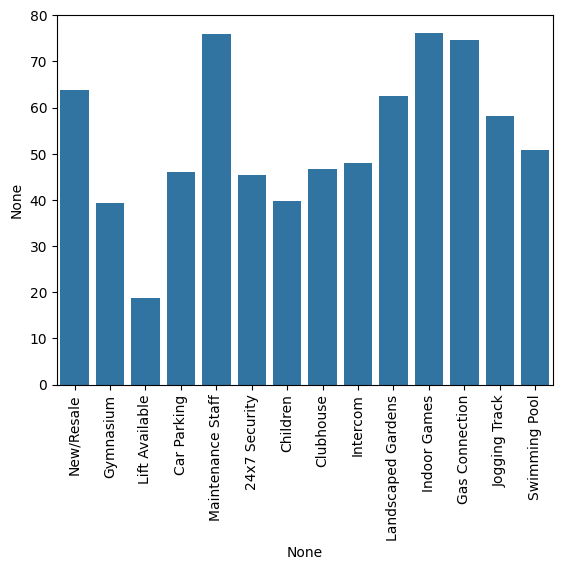

In [9]:
sns.barplot(x=percent_0.index,y=percent_0)
plt.xticks(rotation=90);

In [10]:
features = [
    "New/Resale",
    "Gymnasium",
    "Car Parking",
    "Maintenance Staff",
    "24x7 Security",
    "Children",
    "Clubhouse",
    "Intercom",
    "Landscaped Gardens",
    "Indoor Games",
    "Gas Connection",
    "Jogging Track",
    "Swimming Pool"
]
data = data.drop(columns=features)

<h3><mark>Removing Outliers from Data</mark></h3>

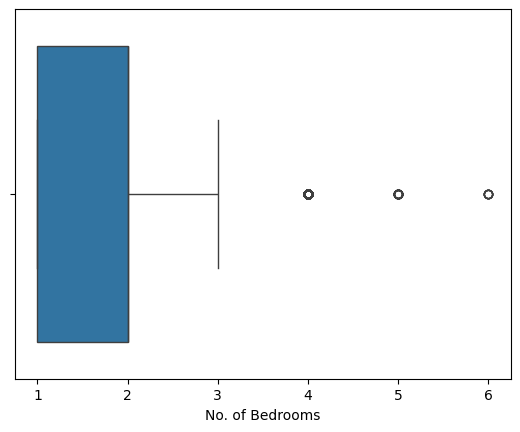

In [11]:
# Box plot for No. of Bedrooms
sns.boxplot(x=data['No. of Bedrooms'])
plt.xlabel('No. of Bedrooms')
plt.show()

In [12]:
data = data.drop(index=(data[data['No. of Bedrooms']>=4].index))

<Axes: xlabel='Area', ylabel='Price'>

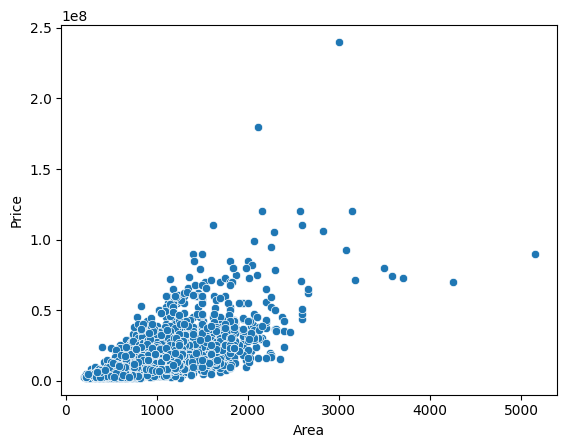

In [13]:
sns.scatterplot(data=data , x='Area', y='Price')

In [14]:
idx_drop = data[data['Price']>100000000].index
idx_drop

Index([267, 1619, 1708, 1734, 1979, 2357, 2451, 2622, 6202], dtype='int64')

In [15]:
idx_drop = idx_drop.append(data[(data['Area']>3000)].index)

In [16]:
data = data.drop(idx_drop,axis=0)

In [17]:
data['price_per_sqft'] = data['Price']*100000/data['Area']

In [18]:
data.price_per_sqft.describe()

count    5.359000e+03
mean     1.276313e+09
std      8.161199e+08
min      1.597444e+08
25%      7.085073e+08
50%      1.000000e+09
75%      1.661728e+09
max      6.446991e+09
Name: price_per_sqft, dtype: float64

In [19]:
m = np.mean(data.price_per_sqft)
st = np.std(data.price_per_sqft)
reduced_df = data[(data.price_per_sqft>(m-st)) & (data.price_per_sqft<=(m+st))]
data = reduced_df

In [20]:
data = data.drop(index=(data[data.Area/data['No. of Bedrooms']<300]).index)

<Axes: xlabel='No. of Bedrooms', ylabel='Price'>

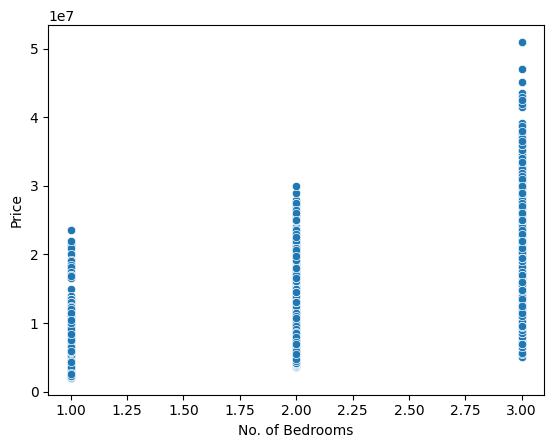

In [21]:
sns.scatterplot(x='No. of Bedrooms' , y='Price' , data=data)

In [22]:
data = data.drop(index = data[(data['No. of Bedrooms']==3)&(data['Price']>40000000)].index)

In [23]:
data = data.drop(index=data[(data['No. of Bedrooms']==1) & (data['Price']>13000000)].index)
data = data.drop(index=data[(data['No. of Bedrooms']==4) & (data['Price']>40000000)].index)

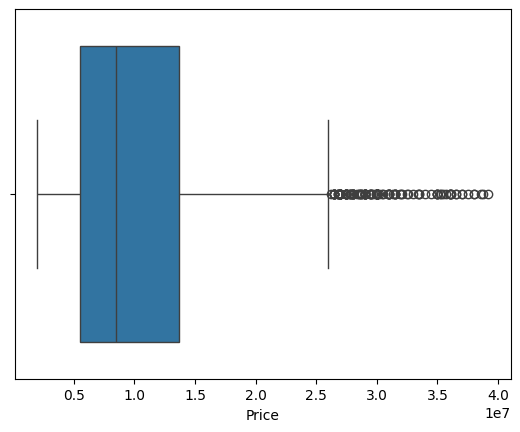

In [24]:
sns.boxplot(x=data['Price'])
plt.xlabel('Price')
plt.show()

In [25]:
data = data.drop(index=data[data['Price']>28000000].index)

<h3><mark>Handling Categorical Data</mark></h3>

In [26]:
len(data.select_dtypes(include='object')['Location'].unique())

84

In [27]:
df_nums = data.select_dtypes(exclude='object')
df_objs = data.select_dtypes(include='object')

<h3><mark>One Hot Encoding</mark></h3>

In [28]:
df_objs = pd.get_dummies(df_objs)

In [29]:
df_objs

,Location_Airoli,Location_Ambernath East,Location_Andheri,Location_Andheri East,Location_Andheri West,Location_Badlapur East,Location_Bandra East,Location_Belapur,Location_Bhandup West,Location_Bhayandar East,...,Location_Vasai West,Location_Vasai east,Location_Vashi,Location_Ville Parle East,Location_Virar,Location_Virar East,Location_Virar West,Location_Wadala,Location_Wadala East Wadala,Location_mumbai
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6341,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6343,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [31]:
final_df.shape

(4005, 89)

In [32]:
final_df = final_df.drop(columns=['price_per_sqft'])

In [33]:
final_df['Price'] = final_df['Price']/100000

In [34]:
final_df

,Price,Area,No. of Bedrooms,Lift Available,Location_Airoli,Location_Ambernath East,Location_Andheri,Location_Andheri East,Location_Andheri West,Location_Badlapur East,...,Location_Vasai West,Location_Vasai east,Location_Vashi,Location_Ville Parle East,Location_Virar,Location_Virar East,Location_Virar West,Location_Wadala,Location_Wadala East Wadala,Location_mumbai
0,48.5,720,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,45.0,600,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67.0,650,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45.0,650,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,50.0,665,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338,26.0,530,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6340,72.0,995,2,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6341,70.0,1020,2,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6343,145.0,900,2,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
final_df.columns

Index(['Price', 'Area', 'No. of Bedrooms', 'Lift Available', 'Location_Airoli',
       'Location_Ambernath East', 'Location_Andheri', 'Location_Andheri East',
       'Location_Andheri West', 'Location_Badlapur East',
       'Location_Bandra East', 'Location_Belapur', 'Location_Bhandup West',
       'Location_Bhayandar East', 'Location_Bhiwandi', 'Location_Boisar',
       'Location_Borivali East', 'Location_Borivali West', 'Location_Chembur',
       'Location_Chembur East', 'Location_Dahisar', 'Location_Dahisar East',
       'Location_Dahisar West', 'Location_Dattapada', 'Location_Dombivali',
       'Location_Dombivali East', 'Location_Dombivli (West)',
       'Location_Dronagiri', 'Location_Ghansoli', 'Location_Ghatkopar',
       'Location_Ghatkopar West', 'Location_Goregaon',
       'Location_Goregaon East', 'Location_Goregaon West',
       'Location_Jogeshwari West', 'Location_Juhu', 'Location_Kalwa',
       'Location_Kalyan East', 'Location_Kalyan West', 'Location_Kamothe',
       '

In [36]:
final_df.to_csv("./house_data_final",index=False)